### DENOISING AUTOENCODER MODEL

#### Load and Prepare the data

In [2]:
import pandas as pd

file_path = 'Project datasets/Sample files/train_inputs_50.csv'
df = pd.read_csv(file_path, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,7.870000e-07,0.066955,5.071800e-03,0.020617,0.010468,0.013307,0.042037,0.057356,0.008097,0.049136,...,0.038622,0.038629,0.038639,0.064431,0.012879,7.870000e-07,0.064418,0.077272,0.025672,0.038529
1,1.349200e-01,0.142860,1.031700e-01,0.103170,0.087302,0.103170,0.103170,0.087302,0.111110,0.079365,...,0.031746,0.015873,0.031746,0.031746,0.031746,1.587300e-02,0.023810,0.031746,0.039683,0.023810
2,7.240000e-07,0.044917,7.240000e-07,0.013614,0.026990,0.016517,0.029796,0.054960,0.044535,0.045996,...,0.018942,0.030949,0.031089,0.031230,0.031373,1.964800e-02,0.043530,0.043677,0.031958,0.032108
3,1.212100e-01,0.121210,1.313100e-01,0.121210,0.090909,0.111110,0.080808,0.101010,0.141410,0.101010,...,0.020202,0.040404,0.040404,0.040404,0.030303,3.030300e-02,0.040404,0.020202,0.010101,0.030303
4,1.078400e-01,0.117650,1.078400e-01,0.058824,0.107840,0.117650,0.117650,0.098039,0.117650,0.107840,...,0.019608,0.019608,0.009804,0.039216,0.019608,3.921600e-02,0.029412,0.029412,0.049020,0.049020


In [3]:
# Import train and test data
X_train = pd.read_csv('Project datasets/Sample files/train_inputs_50.csv', header=None)
y_train = pd.read_csv('Project datasets/Sample files/train_outputs_50.csv', header=None)
X_test = pd.read_csv('Project datasets/Sample files/test_inputs_50.csv', header=None)
y_test = pd.read_csv('Project datasets/Sample files/test_outputs_50.csv', header=None)

##### Define DAE model architecture

In [4]:
# Importing the necessary libraries for denoising autoencoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [5]:
# Define the dimensions
input_dim = X_train.shape[1]  # Number of columns (wavenumber shifts)

In [6]:
# Encoder
input_layer = Input(shape=(input_dim,))
encoder = Dense(128, activation="relu")(input_layer)
encoder = Dense(64, activation="relu")(encoder)
encoder = Dense(32, activation="relu")(encoder)

In [7]:
# Decoder
decoder = Dense(64, activation="relu")(encoder)
decoder = Dense(128, activation="relu")(decoder)
output_layer = Dense(input_dim, activation="linear")(decoder)

In [8]:
# Build the model
dae = Model(inputs=input_layer, outputs=output_layer)
dae.compile(optimizer="adam", loss="mean_squared_error")
dae.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 128)               64128     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 500)               64500 

##### Train the model

In [9]:
# Train the DAE
history = dae.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/100
7/7 [==============================] - 5s 229ms/step - loss: 0.0011 - val_loss: 9.0719e-04
Epoch 2/100
7/7 [==============================] - 0s 17ms/step - loss: 6.3311e-04 - val_loss: 3.4608e-04
Epoch 3/100
7/7 [==============================] - 0s 17ms/step - loss: 3.3682e-04 - val_loss: 1.5572e-04
Epoch 4/100
7/7 [==============================] - 0s 19ms/step - loss: 2.2286e-04 - val_loss: 8.2385e-05
Epoch 5/100
7/7 [==============================] - 0s 20ms/step - loss: 1.4541e-04 - val_loss: 9.2629e-05
Epoch 6/100
7/7 [==============================] - 0s 36ms/step - loss: 1.2403e-04 - val_loss: 4.1068e-05
Epoch 7/100
7/7 [==============================] - 0s 20ms/step - loss: 9.7638e-05 - val_loss: 3.8777e-05
Epoch 8/100
7/7 [==============================] - 0s 23ms/step - loss: 9.2299e-05 - val_loss: 3.7429e-05
Epoch 9/100
7/7 [==============================] - 0s 20ms/step - loss: 7.5619e-05 - val_loss: 4.7188e-05
Epoch 10/100
7/7 [==============================]

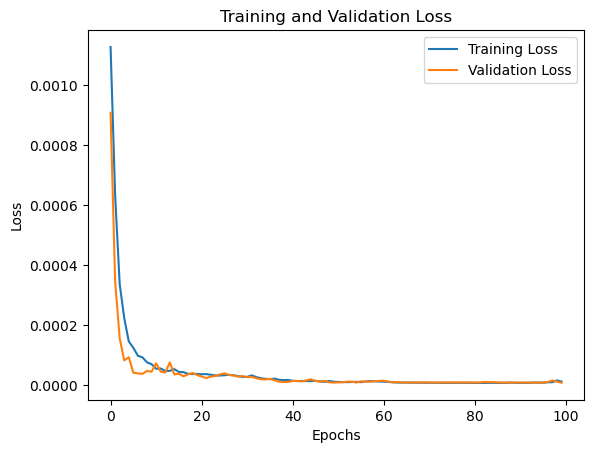

In [10]:
import matplotlib.pyplot as plt

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

##### Predictions

In [11]:
# Predict on the test set
predicted_output = dae.predict(X_test)

2/2 [==============================] - 1s 15ms/step


In [12]:
# Convert from array to dataframe
predicted_output = pd.DataFrame(predicted_output)

##### Evaluate the model

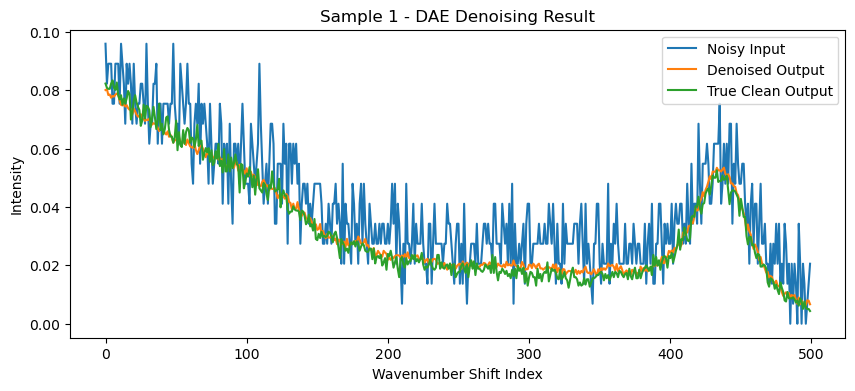

In [34]:
# Visualize original noisy, predicted denoised, and true clean spectra for a few samples

plt.figure(figsize=(10, 4))
plt.plot(X_test.iloc[1], label='Noisy Input')
plt.plot(predicted_output.iloc[1], label='Denoised Output')
plt.plot(y_test.iloc[1], label='True Clean Output')
plt.xlabel('Wavenumber Shift Index')
plt.ylabel('Intensity')
plt.legend()
plt.title(f'Sample 1 - DAE Denoising Result')
plt.show()

In [14]:
import plotly.graph_objects as go

# Example data from your variables
noisy_input = X_test.iloc[1]
denoised_output = predicted_output.iloc[1]
true_clean_output = y_test.iloc[1]

# Create traces for each distribution
trace1 = go.Scatter(
    y=noisy_input,
    mode='lines',
    name='Noisy Input',
    line=dict(color='cyan')  # Adjust color as needed
)
trace2 = go.Scatter(
    y=denoised_output,
    mode='lines',
    name='Denoised Output',
    line=dict(color='green')  # Adjust color as needed
)
trace3 = go.Scatter(
    y=true_clean_output,
    mode='lines',
    name='True Clean Output',
    line=dict(color='orange')  # Adjust color as needed
)

# Add traces to the figure
fig = go.Figure(data=[trace1, trace2, trace3])

# Update layout to add title and labels
fig.update_layout(
    title='Comparison of Noisy, Denoised, and True Outputs',
    xaxis_title='Wavenumber Shift Index',
    yaxis_title='Intensity'
)

# Show the figure
fig.show()


In [15]:
dae.save('dae_model.h5')

#### Metrics for Evaluation

In [16]:
# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

# Calculate MSE for each sample and then the average
mse = mean_squared_error(y_test, predicted_output)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 7.898034530722575e-06


In [23]:
# Root Mean Squared Error (RMSE)
import numpy as np
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.0028103442014676024


In [24]:
# Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(y_test, predicted_output)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 0.0021861330413020202


In [32]:
# Calculate SNR for each sample individually and then average
snr_values = [10 * np.log10(np.sum(y_test[i] ** 2) / np.sum((y_test[i] - predicted_output[i]) ** 2)) for i in range(len(y_test))]
mean_snr_dae = np.mean(snr_values)

# Print the mean SNR
print(f"Mean Signal-to-Noise Ratio (SNR) for DAE Model: {mean_snr_dae:.2f} dB")

Mean Signal-to-Noise Ratio (SNR) for DAE Model: 25.88 dB


In [26]:
# Peak Signal-to-Noise Ratio (PSNR)

# Define a function to calculate PSNR
def calculate_psnr(y_true, y_pred):
    max_val = np.max(y_true)  # Peak intensity in the clean spectra
    mse = np.mean((y_true - y_pred) ** 2)
    psnr = 10 * np.log10((max_val ** 2) / mse)
    return psnr

# Calculate PSNR for each test sample and take the mean
psnr_values = [calculate_psnr(y_test[i], predicted_output[i]) for i in range(len(y_test))]
mean_psnr = np.mean(psnr_values)
print(f"Mean PSNR: {mean_psnr} dB")


Mean PSNR: 26.592247040661636 dB


In [27]:
# Structural Similarity Index (SSI)

from skimage.metrics import structural_similarity as ssim

# Calculate SSIM for each test sample and take the mean
ssim_values = [ssim(y_test[i], predicted_output[i]) for i in range(len(y_test))]
mean_ssim = np.mean(ssim_values)
print(f"Mean SSIM: {mean_ssim}")

Mean SSIM: 0.996179331957553


c:\Users\91892\anaconda3\lib\site-packages\skimage\_shared\utils.py:348: UserWarning:

Inputs have mismatched dtype.  Setting data_range based on im1.dtype.



In [33]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Signal-to-Noise Ratio (SNR) for DAE Model: {mean_snr_dae:.2f} dB")
print(f"Mean Peak Signal to Noise Ratio (PSNR): {mean_psnr} dB")
print(f"Mean Structural Similarity Index (SSIM): {mean_ssim}")

Mean Squared Error (MSE): 7.898034530722575e-06
Root Mean Squared Error (RMSE): 0.0028103442014676024
Mean Absolute Error (MAE): 0.0021861330413020202
Mean Signal-to-Noise Ratio (SNR) for DAE Model: 25.88 dB
Mean Peak Signal to Noise Ratio (PSNR): 26.592247040661636 dB
Mean Structural Similarity Index (SSIM): 0.996179331957553


#### Note: On comparison, this is selected as the final model to deploy